### Загрузка данных и подготовка к анализу

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re

In [55]:
dataset_cafe = pd.read_csv('/home/alina/Downloads/rest_data.csv')
dataset_cafe.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [58]:
dataset_cafe.shape #Размерность датафрейма

(15366, 6)

In [59]:
dataset_cafe.drop_duplicates()
dataset_cafe.dropna() #обработка данных(удаление пропущенных значений и дубликатов)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [60]:
dataset_cafe.dtypes #типы данных во всех колонках привильные, можно приступать к обработке

id              int64
object_name    object
chain          object
object_type    object
address        object
number          int64
dtype: object

### Анализ данных

1) Исследование соотношения типов объектов по количеству

Text(0, 0.5, 'количество')

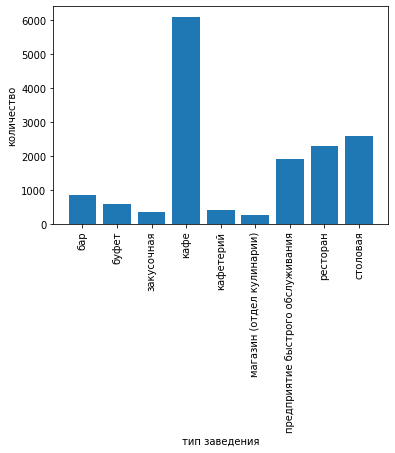

In [190]:
cafe_count_type = dataset_cafe.groupby('object_type').agg({'id' : 'count'}).\
                    reset_index().rename(columns={'id' : 'count_type'})
#sns.distplot(cafe_count_type['count_type'], kde=False, bins = 10)
#plt.show()
plt.bar(cafe_count_type['object_type'],cafe_count_type['count_type'])
plt.xticks(rotation = 90)
plt.xlabel('тип заведения')
plt.ylabel('количество')

2) Соотношение сетвых и несетевых заведений по их количеству

Text(0, 0.5, 'количество')

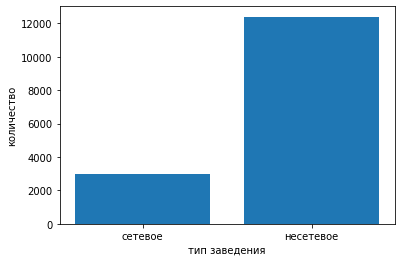

In [113]:
cafe_count_chain = dataset_cafe.groupby('chain').agg({'id':'count'}).\
                    reset_index().rename(columns={'id':'count_chain'})
plt.bar(cafe_count_chain.chain, cafe_count_chain.count_chain)
plt.xticks(np.arange(2),['сетевое','несетевое'])
plt.xlabel('тип заведения')
plt.ylabel('количество')

3) Объект общественного питаня, для которого характерно сетевое распространение

In [124]:
cafe_chain = dataset_cafe.groupby(['object_type','chain']).agg({'id':'count'}).\
             reset_index().rename(columns={'id':'count'})
cafe_chain[cafe_chain.chain == 'да'].sort_values(by='count',ascending = False).head(1)

,object_type,chain,count
6,кафе,да,1396


4) Характеристики для сетевых заведений

Text(0.5, 0, 'количество посадочных мест')

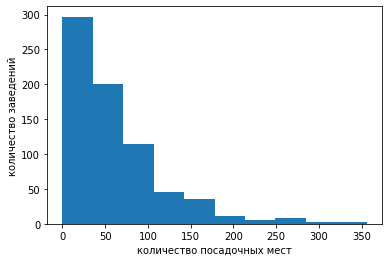

In [163]:
cafe_number_mean = dataset_cafe[dataset_cafe.chain == 'да'].groupby('object_name').\
                    agg({'number':'mean'}).reset_index()
plt.hist(cafe_number_mean.number, bins = 10)
plt.ylabel('количество заведений')
plt.xlabel('количество посадочных мест')

Для сетевых кафе характерно и то, и другое (много заведений с маленьким* числом посадочных мест и мало заведений с большим** числом посадочных мест).

*маленьким считается кафе, где число посадочных мест не ревышает 50 чел.

** большим считается кафе, где число посадочных мест первышает 180 чел.

5) Среднее число осадочных мест для каждого вида объекта

In [191]:
cafe_count_number =cafe_count_type.merge(dataset_cafe.groupby('object_type').\
                agg({'number':'mean'}), on='object_type')
cafe_count_number #среднее число посадочных мест представлено в колонке number

,object_type,count_type,number
0,бар,856,43.494159
1,буфет,585,51.129915
2,закусочная,360,7.608333
3,кафе,6099,39.716019
4,кафетерий,398,9.123116
5,магазин (отдел кулинарии),273,5.589744
6,предприятие быстрого обслуживания,1923,20.552262
7,ресторан,2285,96.834136
8,столовая,2587,130.246618


In [192]:
cafe_count_number.sort_values(by='number',ascending=False).head(1) #Представляет в среднем наибольшее кол-во 
# посадочных мест

,object_type,count_type,number
8,столовая,2587,130.246618


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

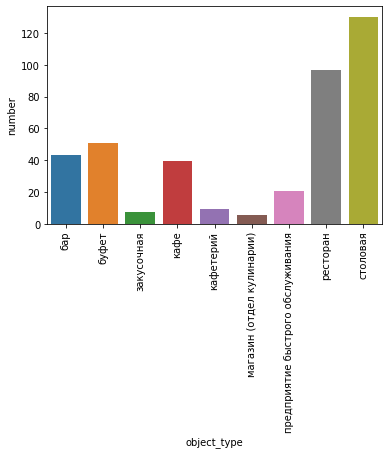

In [194]:
sns.barplot(cafe_count_number.object_type, cafe_count_number.number)
plt.xticks(rotation = 90)

6) Выделение улицы в адресе кафе

In [249]:
dataset_cafe['street'] = dataset_cafe.address.str.split(',').str[1].to_frame()
dataset_cafe = dataset_cafe[dataset_cafe['street'].str.contains('улица')]
dataset_cafe

/home/alina/PycharmProjects/Unit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15356,220618,Шоколадница,да,кафе,"город Москва, Митинская улица, дом 36, корпус 1",100,Митинская улица
15359,222077,Кофейня «Шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15360,219759,Шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал


7) Выделение топ-10 самых популярных улиц

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

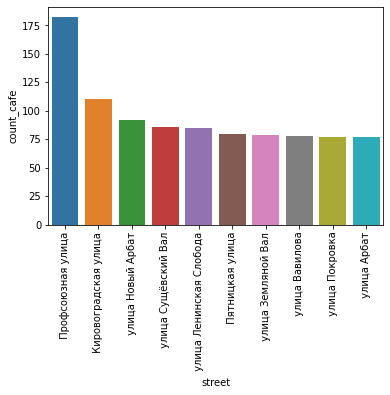

In [280]:
top_street = dataset_cafe.groupby('street').agg({'id':'count'}).rename(columns={'id':'count_cafe'}).\
sort_values(by='count_cafe',ascending = False).reset_index()
top_10_street = top_street.head(10)
sns.barplot(top_10_street.street, top_10_street['count_cafe'])
plt.xticks(rotation = 90)


В большинстве это улицы центра Москвы, в пределах Садового кольца.

8) Улицы с одним объектом питания

In [285]:
top_street[top_street.count_cafe == 1] #названия улиц

,street,count_cafe
850,11-я Парковая улица,1
851,улица Паперника,1
852,Винницкая улица,1
853,1-я Гражданская улица,1
854,2-я Прядильная улица,1
...,...,...
1082,улица Капотня,1
1083,Малая Переяславская улица,1
1084,улица Инессы Арманд,1
1085,Малая Тульская улица,1


In [286]:
top_street[top_street.count_cafe == 1].count() #кол-во улиц

street        237
count_cafe    237
dtype: int64

Эти улицы находятся в пределах МКАД. Малое количество заведений указывает на то, что либо это промышленные районы, либо спальные. Еще можно предположить, что в датафрейме недостаточное количество информации.

9) Распределение количества посадочных мест на топ-10 улиц

In [314]:
street_list = top_10_street.street.tolist() #список из 10 улиц

Text(0, 0.5, 'Количество заведений')

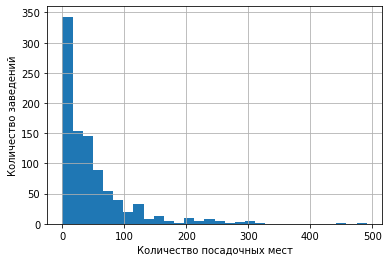

In [328]:
cafe_top_10 = dataset_cafe[dataset_cafe.street.isin(street_list)] #проверяем вхождение 10 улиц 
#в исходный датафрейм
cafe_top_10['number'].hist(bins=30)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')

Большая часть заведений рассчитана на количество посадочных мест до 40 человек. Поскольку в основном эти 10 улиц находятся в центре Москвы, где очень дорогая земля, логично преположить, что территория этих заведений мальенкая, откуда следует небольшое количество посадочных мест.

### Выводы

In [339]:
top_street = cafe_top_10.groupby('object_type').agg({'id':'count'}).reset_index().\
            sort_values(by='id', ascending = False).merge(cafe_count_number[['object_type','number']])
top_street

,object_type,id,number
0,кафе,481,39.716019
1,ресторан,170,96.834136
2,предприятие быстрого обслуживания,123,20.552262
3,бар,63,43.494159
4,столовая,42,130.246618
5,кафетерий,22,9.123116
6,буфет,18,51.129915
7,закусочная,16,7.608333
8,магазин (отдел кулинарии),11,5.589744


В таблице представлена информация о заведениях на самых популярных улицах Москвы. Видно, что наибольший интерес представляют кафе и рестораны. Однако мне кажется, что в данной ситуации стоит развивать сеть заведений типа "кафетерии", так как:

1) В центральных районах Москвы количество кафетериев невелико, можно одними из первых выйти на рынок, сделав упор на качество обслуживания и еды.

2) Число посадочных мест ~10, что предполагает небольшую площадь помещения(актуально для центра Москвы из-за дорогой аренды земли)